In [250]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
import matplotlib as mpl
%matplotlib inline

single_width = 89*0.0393701
double_width = 183*0.0393701
plt.rc('font', family='sans')
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

os.chdir('/home/pablo/Insync/StarrA1@cardiff.ac.uk/OneDrive Biz/Paper 1/repo/Southern_Ocean_Lead')
print(os.getcwd())  # Prints the current working directory


/home/pablo/Insync/StarrA1@cardiff.ac.uk/OneDrive Biz/Paper 1/repo/Southern_Ocean_Lead


In [232]:
mis = pd.read_csv('/home/pablo/Documents/MATLAB/Functions/MY FUNCTION/misplot/MISboundaries.txt',sep='\t')


# Figure 2
- IRD_MAR
- d13C
- d18O

In [244]:
ds = pd.read_csv('raw/starr_submitted.csv')

t = ds['Age (kyr)']
y0 = ds['C. wuellerstorfi d13C (‰ vs. PDB)']
y1 = ds['IRD Apparent MAR (grains/cm2/kyr)']
y2 = ds['C. wuellerstorfi d18O (‰ vs. PDB)']

color2 = 'orangered'
color3 = '#009688'
color1 = 'darkmagenta'

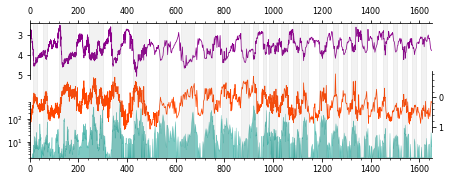

In [251]:

fig,axes = plt.subplots(nrows = 3, figsize=(double_width, single_width*1), sharex=True)

mask = np.isfinite(y0)
axes[1].plot(t[mask],y0[mask],lw=0.75,color=color2)
mask = np.isfinite(y1)
axes[2].fill_between(t[mask],y1[mask]+2,color=color3, alpha=0.5, lw=0.5)

mask = np.isfinite(y2)
axes[0].plot(t[mask],y2[mask],lw=0.75,color=color1)

for ax in axes:
    ax.patch.set_visible(False)
axes[0].invert_yaxis()
axes[1].invert_yaxis()
axes[2].set_yscale('log')
axes[0].spines['right'].set_visible(False)
axes[0].spines['bottom'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[1].yaxis.set_ticks_position('right')
axes[1].xaxis.set_visible(False)
axes[0].xaxis.set_ticks_position('top')
axes[0].xaxis.set_minor_locator(AutoMinorLocator(5))
axes[1].yaxis.set_minor_locator(AutoMinorLocator(5))


box = axes[0].get_position()
box.y0 = box.y0 - 0.12
box.y1 = box.y1 - 0.12
axes[0].set_position(box)

box = axes[1].get_position()
box.y0 = box.y0 -0.065
box.y1 = box.y1 - 0.045
axes[1].set_position(box)

box = axes[2].get_position()
box.y0 = box.y0 +0.1
box.y1 = box.y1 + 0.1
axes[2].set_position(box)

axes[0].set_xlim(0,1650)
axes[2].set_ylim(2,600)

alp = 0.1
ymax = 2.4
for i in range(0,56,2):
    axes[2].axvspan(mis.iloc[i,1], mis.iloc[i+1,1], ymax=ymax, alpha=alp, color='grey', clip_on=False)



plt.show()
fig.savefig('figures/figure1.pdf',papertype = 'a4', orientation = 'portrait')